In [30]:
#Задание 1
# Построить график зависимости термического КПД от давления промежуточного перегрева водяного пара для условий примера:
# Р0=12 МПа;
# 𝑡0=530 °С;
# Рк=5 кПа. Параметры промперегрева:
# Рп.п.=1, 2, 3, 4, 5, 6 МПа;
# 𝑡п.п.=530 °С.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import iapws
from iapws import IAPWS97 as gas

In [32]:
# единицы измерения
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
grad_Cels = 1

In [33]:
def kpd2(PO,TO,P_PP,T_PP,PK):
    point_0_start = gas(P=PO * unit, T=(TO + 273.15))
    point_0_end = gas(P=P_PP, s=point_0_start.s)
    point_1_start = gas(P=P_PP, T=(T_PP + 273.15))
    point_condenser = gas(P=PK * unit, s=point_1_start.s)
    point_pump = gas(P=PK * unit, x=0)
    useful_energy = (point_0_start.h - point_0_end.h) + (point_1_start.h - point_condenser.h)
    full_energy = (point_0_start.h - point_pump.h) + (point_1_start.h - point_0_end.h)
    kpd_value = (useful_energy / full_energy) * 100
    return kpd_value

In [34]:
# масивы значений давления и темпратуры
t_O = 450 * grad_Cels
p_O = 12 * MPa
p_nn = np.array([1, 2, 3, 4, 5, 6])
t_nn = 530 * grad_Cels
p_k = 5 * kPa

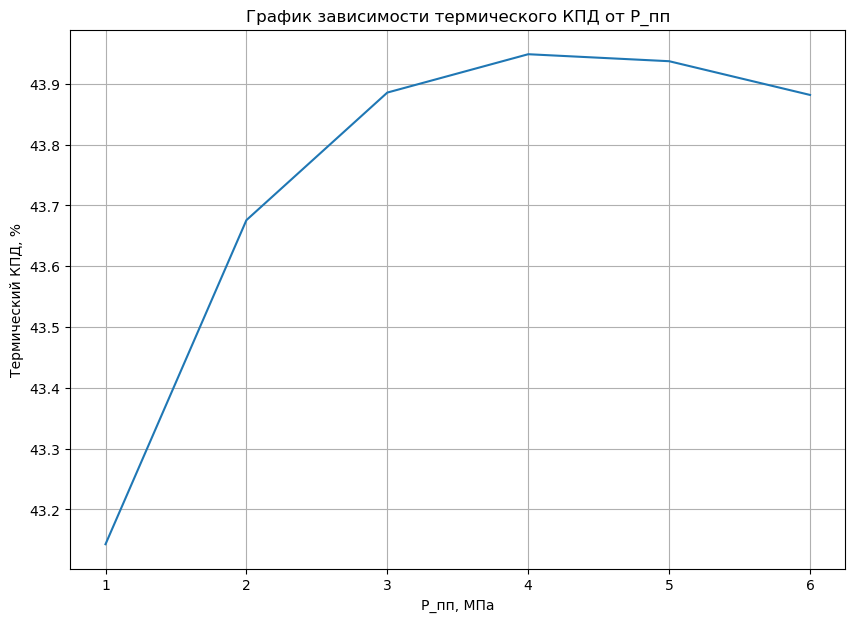

In [35]:
# построение графика и создание массива
fig, graf = plt.subplots(1, 1, figsize=(10, 7))
effekt = []
for P_nn in p_nn:
    effekt_value = kpd2(p_O,t_O,P_nn,t_nn,p_k)
    effekt.append(effekt_value)
graf.grid()
graf.set_xlabel("P_пп, МПа")
graf.set_ylabel("Термический КПД, %")
graf.set_title("График зависимости термического КПД от P_пп")
graf.plot(p_nn, effekt, label=f"При P_пп = {p_nn} (КПа)")
plt.show()

In [36]:
#Задание 2
#Построить график изолиний термического КПД от давления промежуточного перегрева и начальной температуры для Р_0$=12 МПа; 
#𝑡0=530 °С; Рк=5 кПа. Графиком покрыть множество максимумов КПД. Для отрисовки прочитать документацию

In [37]:
#значения
t0 = 530 + 273.15 #K
P0 = 12 * MPa
T_pp = []
P_pp = []
Pk = 5 * kPa

In [38]:
P_pp.append(Pk*unit)
for i in range(0,12):
    P_pp.append((i+1))

T0_0 = gas(P = P0*unit, T=(t0+273.15))
T0_1 = gas(P = P_pp[0], s = T0_0.s)

T_pp.append(T0_1.T)
for i in range(0,len(P_pp)-1):
    T_pp.append(300+20*(i+1))

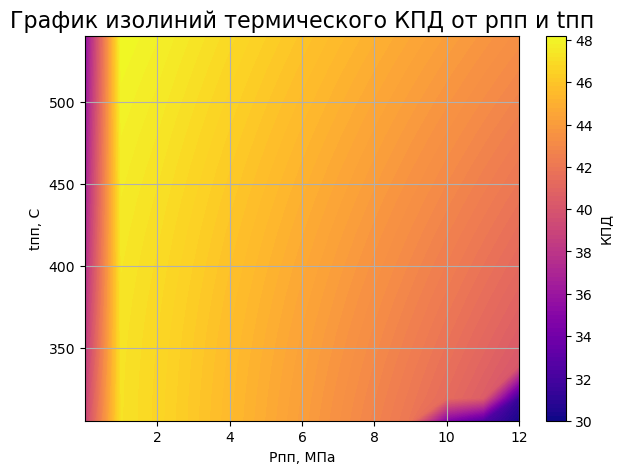

In [39]:
#создание значений и построение графика
Efficiency = {}
for t_pp in T_pp:
    eff_value = []
    for p_pp in P_pp:
        effmat = kpd2(P0,t0,p_pp,t_pp,Pk)
        eff_value.append(effmat)
    Efficiency[t_pp] = eff_value
fig = plt.figure(figsize=(7, 5))
axis = fig.add_subplot()

cs = axis.contourf(P_pp, T_pp, Efficiency.values(),levels=100, cmap = 'plasma')
plt.title('График изолиний термического КПД от pпп и tпп', fontsize=16)
plt.xlabel('Pпп, МПа')
plt.ylabel('tпп, С')
plt.grid(True)

cbar = fig.colorbar(cs)
cbar.set_label('КПД')

In [40]:
# Задание 3
# При удельных расходах водяного пара
# 𝑑01= 2,9 кг/(кВт·ч) и
# 𝑑02= 3,4 кг/(кВт·ч) оценить удельные расходы теплоты на выработку электроэнергии, приняв разность энтальпий
# ℎ0 – ℎп.в.= 2400 кДж/кг.

In [41]:
h0_hnv = 2400  # кДж/кг
d = [2.9, 3.4]  # кг/(кВт*ч)


for m in d:
    Q = m * h0_hnv / 3600
    print(
        f'Значение удельного расхода теплоты на выработку электроэнергии при расходе d = {m} (кг/(кВт*ч)) Q = {round(Q, 3)} кг/кВт*ч')

Значение удельного расхода теплоты на выработку электроэнергии при расходе d = 2.9 (кг/(кВт*ч)) Q = 1.933 кг/кВт*ч
Значение удельного расхода теплоты на выработку электроэнергии при расходе d = 3.4 (кг/(кВт*ч)) Q = 2.267 кг/кВт*ч


In [42]:
# Задание 4
# Написать код для решения задачи оптимизации параметров промежуточного перегрева
# 𝑃п.п. и 𝑡п.п.для свободных начальных параметров Р0, 𝑡0, Рк.
# Сделаем допущение, что начальная точка процесса расширения всегда находится в зоне перегретого пара.
# Решение должно выдавать параметры промежуточного перегрева и термический КПД при них.
# На основе этого кода собрать информацию об оптимальных давлениях промежуточного перегрева и температуры при
# 𝑃0 от 5 до 12 МПа с шагом 1 МПа и температурой 𝑡0= 500 °С,
# Рк=5 кПа. Сделать график функции оптимального давления промежуточного перегрева от давления 𝑃0.


In [43]:
import iapws
from iapws import IAPWS97 as gas
from scipy.optimize import minimize
import numpy as np
import numpy

In [44]:
# Зададимся единицами измерения
MPa = 10 ** 6
kPa = 10 ** 3
mpa_to_unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

In [45]:
# Данная функция отвечает за определения параметров точек цикла
def chet_points(p_0: float, p_k: float,t_0: float, p_prom: float, t_prom: float):
    point_0_start = gas(T=t_0, P=p_0)
    point_0_end = gas(P=p_prom, s=point_0_start.s)
    point_1_start = gas(P=p_prom, T=t_prom)
    point_condenser = gas(P=p_k * mpa_to_unit, s=point_1_start.s)
    point_pump = gas(P=p_k * mpa_to_unit, x=0)
    return point_0_start, point_0_end, point_1_start, point_condenser, point_pump


In [46]:
# Функция вычисляет термический КПД паротурбинной установки
def chet_efficiency(point_0_start, point_0_end, point_1_start, point_condenser, point_pump) -> float:
    useful_energy = (point_0_start.h - point_0_end.h) + (point_1_start.h - point_condenser.h)
    full_energy = (point_0_start.h - point_pump.h) + (point_1_start.h - point_0_end.h)
    eff = useful_energy / full_energy
    return eff

In [47]:
# Функция отвечающая определение оптимальных параматров промперегрева
def optimal_params(p_0: float, t_0: float, p_k: float) -> (float, float):
    def loss_function(middle_params, p_0=p_0, t_0=t_0, p_k=p_k):
        p_div_p_0, t_div_t_0 = middle_params[0], middle_params[1]
        p_prom = p_0 * p_div_p_0
        t_prom = t_0 * t_div_t_0
        point_0_start, point_0_end, point_1_start, point_condenser, point_pump = chet_points(
            p_0=p_0,
            p_k=p_k,
            t_0=to_kelvin(t_0),
            p_prom=p_prom,
            t_prom=to_kelvin(t_prom)
        )
        efficiency = chet_efficiency(point_0_start, point_0_end, point_1_start, point_condenser, point_pump)
        return 1 - efficiency

    initial_params = np.array([0.5, 0.5])  # Задаем первоночальное приближение
    bounds = ((0.01, 1), (0.01, 1))  # Ограничения
    result = minimize(loss_function, x0=initial_params, bounds=bounds, tol=1e-8)
    p_div_p_0, t_div_t_0 = result.x
    p_prom = p_div_p_0 * p_0  # Искомое давления
    t_prom = t_div_t_0 * t_0  # Искомая температура
    return p_prom, t_prom

При p_0 = 5 МПа давление промперегрева 0.945 МПа
Температура промперегрева 500.0 °C
При p_0 = 6 МПа давление промперегрева 1.199 МПа
Температура промперегрева 500.0 °C
При p_0 = 7 МПа давление промперегрева 1.47 МПа
Температура промперегрева 500.0 °C
При p_0 = 8 МПа давление промперегрева 1.754 МПа
Температура промперегрева 500.0 °C
При p_0 = 9 МПа давление промперегрева 2.052 МПа
Температура промперегрева 500.0 °C
При p_0 = 10 МПа давление промперегрева 2.363 МПа
Температура промперегрева 500.0 °C
При p_0 = 11 МПа давление промперегрева 2.687 МПа
Температура промперегрева 500.0 °C
При p_0 = 12 МПа давление промперегрева 3.022 МПа
Температура промперегрева 500.0 °C


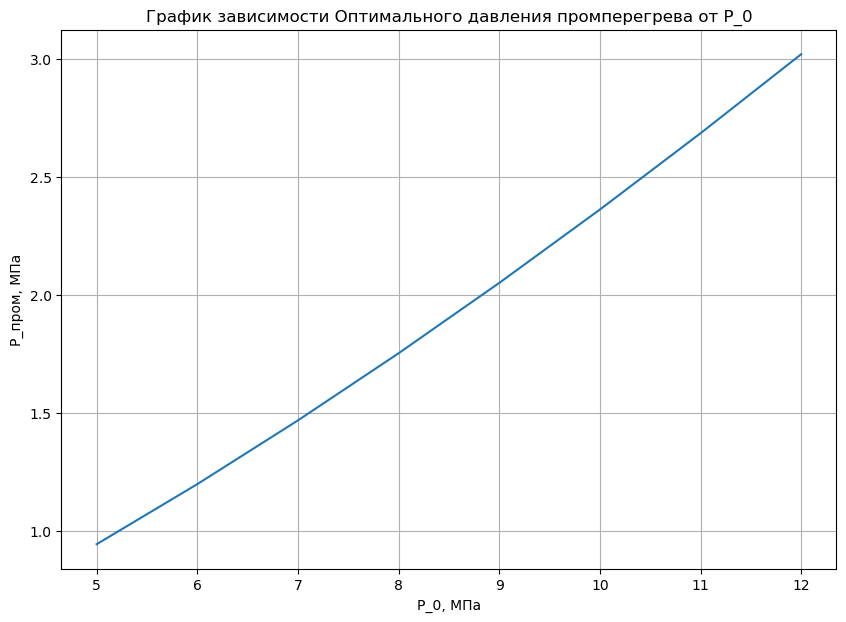

In [48]:
# Решение задачи
fig, graf = plt.subplots(1, 1, figsize=(10, 7))
p_0 = range(5, 13)
t_0 = 500  # °C
p_k = 5 * kPa
p_pr = []
for dav in p_0:
    p_prom, t_prom = (optimal_params(dav, t_0, p_k))
    p_pr.append(p_prom)
    print(f"""При p_0 = {dav} МПа давление промперегрева {round(p_prom, 3)} МПа
Температура промперегрева {t_prom} °C""")
    print(f"======================================================================")
graf.plot(p_0, p_pr)
graf.grid()
graf.set_title("График зависимости Оптимального давления промперегрева от P_0")
graf.set_xlabel("P_0, МПа")
graf.set_ylabel("P_пром, МПа")
plt.show()